### [25.10.30 과제]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
## 데이터 파일 불러와서 확인하기
DATA_FILE = '../Data/남북한발전전력량.xlsx'

df = pd.read_excel(DATA_FILE)

df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [3]:
## 남한, 북한 열 ffill만들어서 결측치 채워주기
df['전력량 (억㎾h)'] = df['전력량 (억㎾h)'].ffill()
df.loc[9] = ['북한','신재생'] + [0]*27

df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,남한,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,남한,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,남한,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,북한,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,북한,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,북한,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
9,북한,신재생,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
## 전력량, 발전 전력별 멀티 인덱스로 만들어주기
df = df.set_index(['전력량 (억㎾h)','발전 전력별'])
df = df.replace('-',0)

df

C:\Users\KDT\AppData\Local\Temp\ipykernel_13340\1746388247.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('-',0)


1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
전력량 (억㎾h) 발전 전력별                                                               
남한        합계      1077  1186  1310  1444  1650  1847  2055  2244  2153  2393   
          수력        64    51    49    60    41    55    52    54    61    61   
          화력       484   573   696   803  1022  1122  1264  1420  1195  1302   
          원자력      529   563   565   581   587   670   739   771   897  1031   
          신재생        0     0     0     0     0     0     0     0     0     0   
북한        합계       277   263   247   221   231   230   213   193   170   186   
          수력       156   150   142   133   138   142   125   107   102   103   
          화력       121   113   105    88    93    88    88    86    68    83   
          원자력        0     0     0     0     0     0     0     0     0     0   
          신재생        0     0     0     0     0     0     0     0     0     0   

                  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
전력량 (억㎾h) 발전 전력별  ...                                                         
남한        합계      ...  4031  4224  4336  4747  4969  5096  5171  5220  5281   
          수력      ...    50    56    56    65    78    77    84    78    58   
          화력      ...  2551  2658  2802  3196  3343  3430  3581  3427  3402   
          원자력     ...  1429  1510  1478  1486  1547  1503  1388  1564  1648   
          신재생     ...     0     0     0     0     0    86   118   151   173   
북한        합계      ...   236   255   235   237   211   215   221   216   190   
          수력      ...   133   141   125   134   132   135   139   130   100   
          화력      ...   103   114   110   103    79    80    82    86    90   
          원자력     ...     0     0     0     0     0     0     0     0     0   
          신재생     ...     0     0     0     0     0     0     0     0     0   

                  2016  
전력량 (억㎾h) 발전 전력별        
남한        합계      5404  
          수력        66  
          화력      3523  
          원자력     1620  
          신재생      195  
북한        합계       239  
          수력       128  
          화력       111  
          원자력        0  
          신재생        0  

[10 rows x 27 columns]

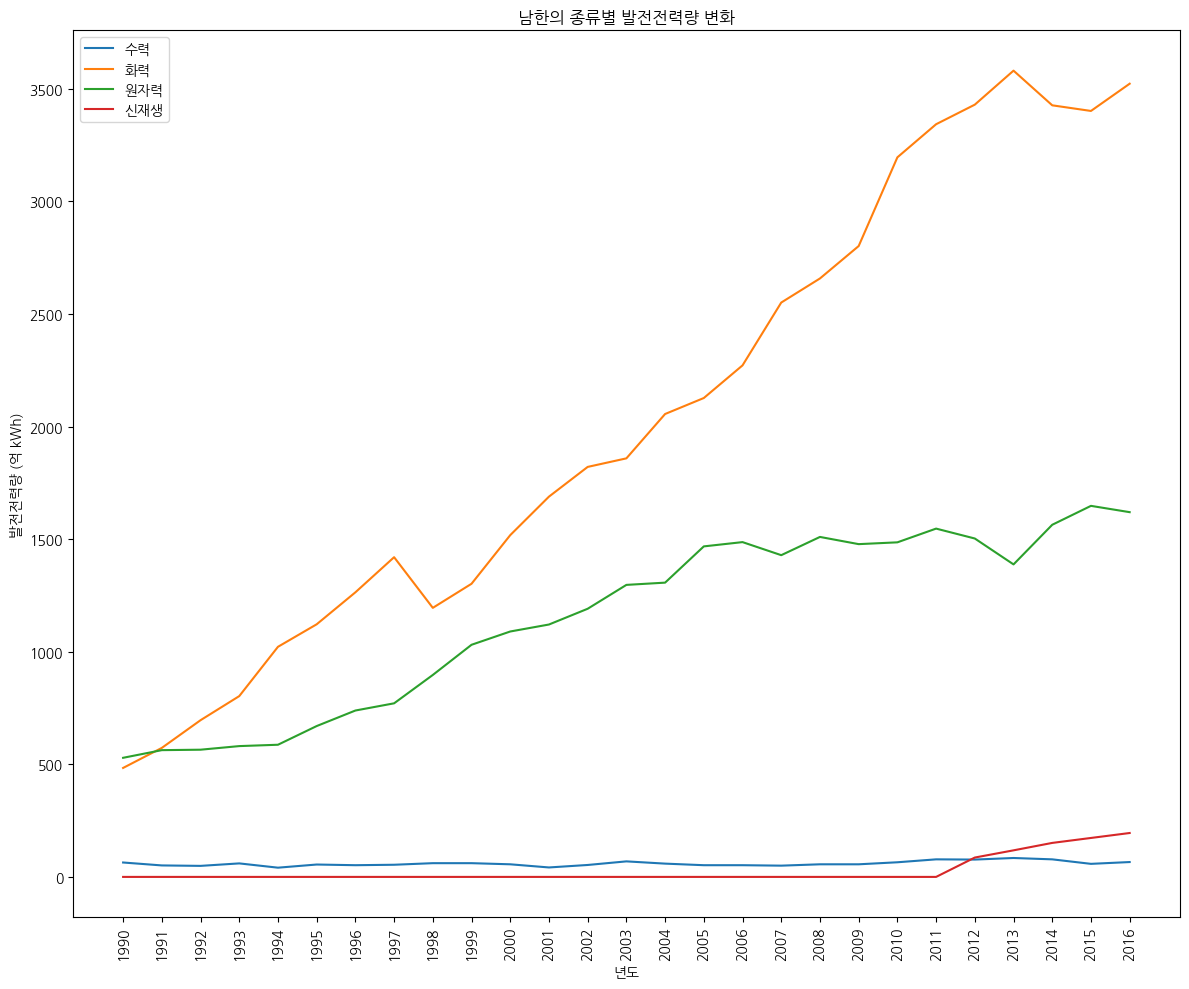

In [5]:
## - (1) 남한의 종류별 발전전력량의 변화
# 남한만 복사
sk = df.loc['남한'].copy()

# 필요한 발전방식만 선택
kind = ['수력', '화력', '원자력', '신재생']
sub = sk.loc[[k for k in sk.index if k in kind]].copy()

# 그래프
plt.figure(figsize=(12, 10))
for label_idx in sub.index:                 
    plt.plot(sub.loc[label_idx], label=label_idx)

plt.legend()
plt.title("남한의 종류별 발전전력량 변화")
plt.xlabel("년도")
plt.ylabel("발전전력량 (억 kWh)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

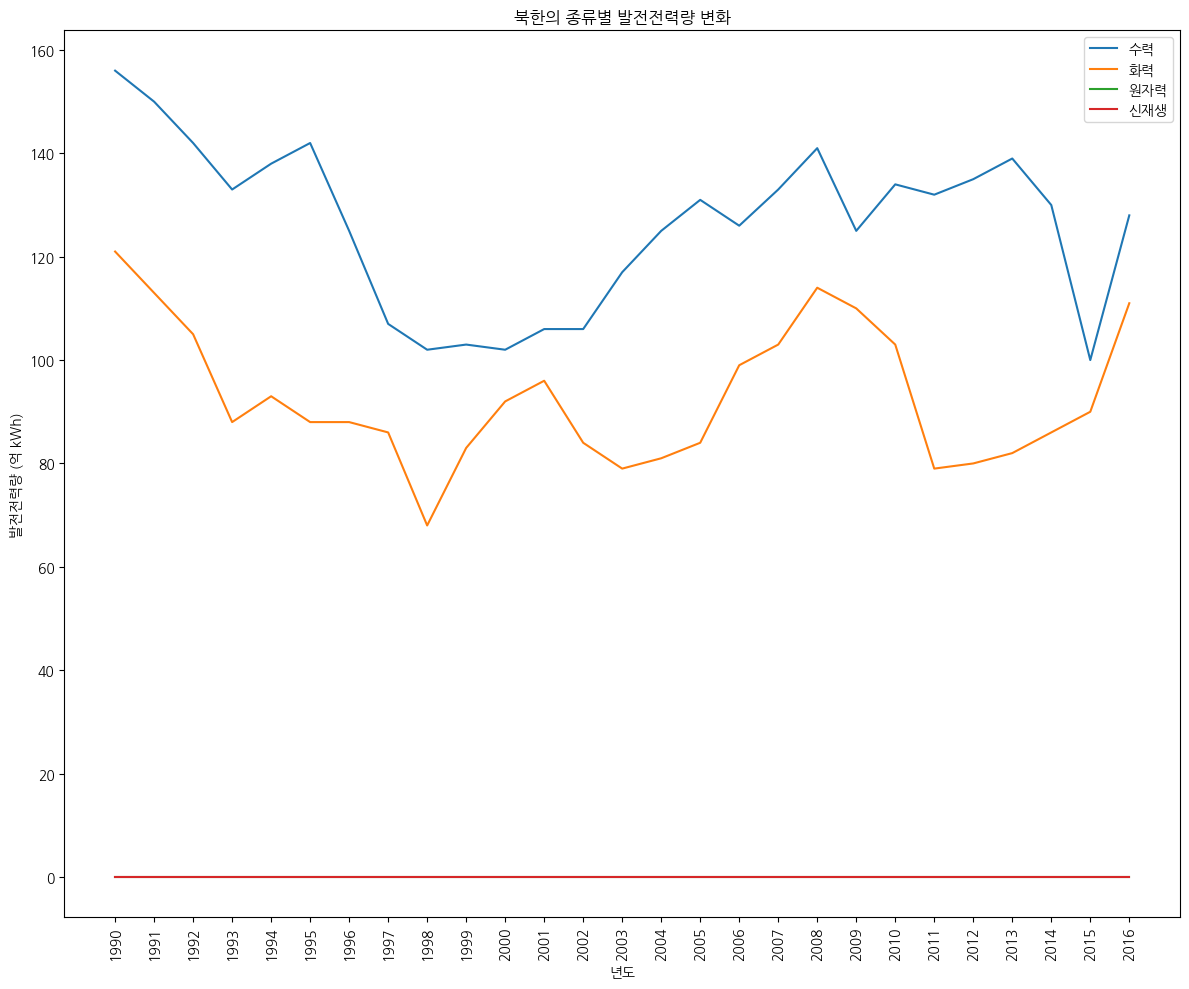

In [6]:
## - (2) 북한의 종류별 발전전력량의 변화
# 북한만 복사
nk = df.loc['북한'].copy()

# 필요한 발전방식만 선택
kind = ['수력', '화력', '원자력', '신재생']
sub = nk.loc[[k for k in nk.index if k in kind]].copy()

# 그래프
plt.figure(figsize=(12, 10))
for label_idx in sub.index:                 
    plt.plot(sub.loc[label_idx], label=label_idx)

plt.legend()
plt.title("북한의 종류별 발전전력량 변화")
plt.xlabel("년도")
plt.ylabel("발전전력량 (억 kWh)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

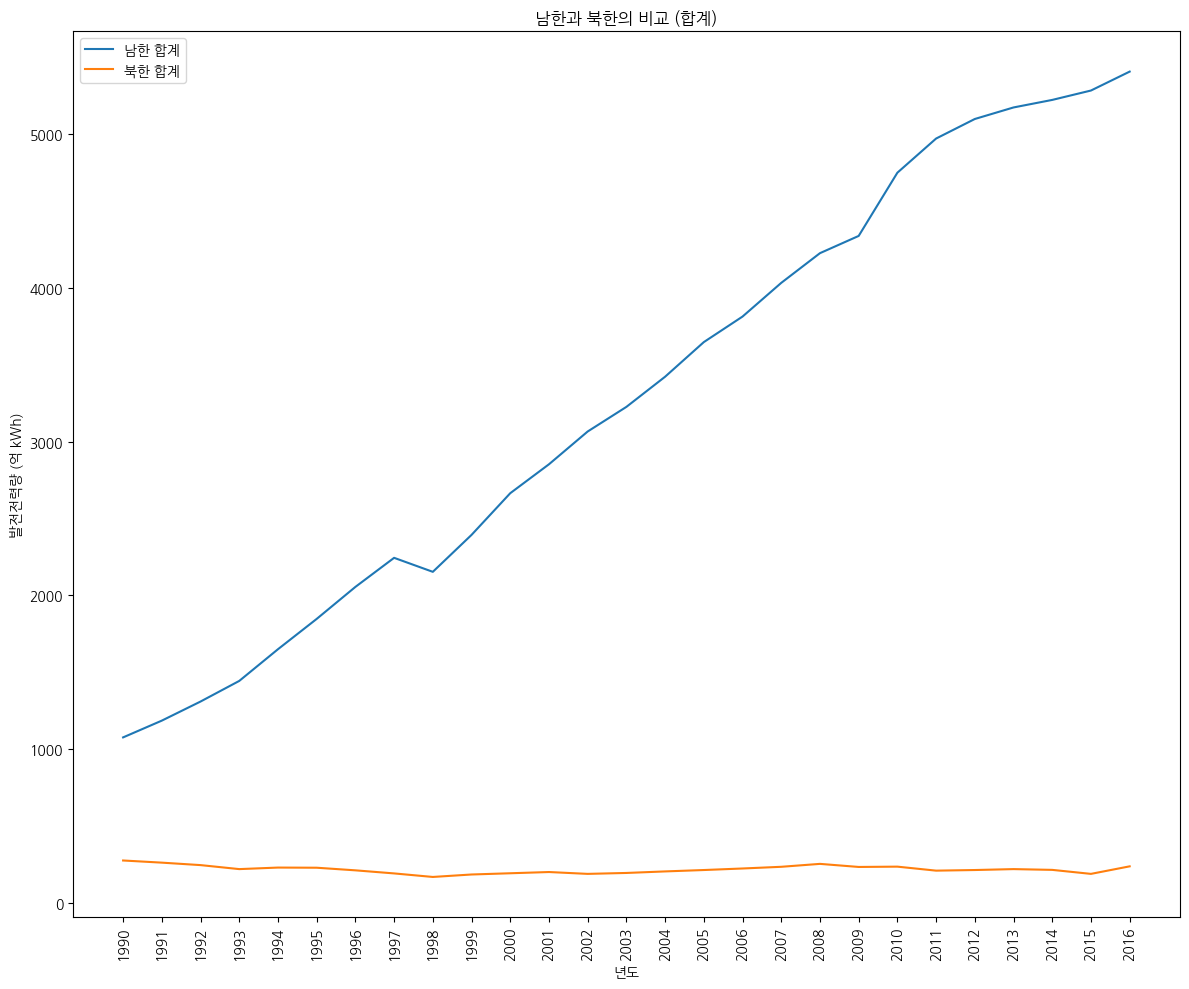

In [7]:
## - (3) 남한과 북한의 비교
# 남한, 북한 복사
sk = df.loc['남한'].copy()
nk = df.loc['북한'].copy()

# 합계만 추출
s1 = sk.loc['합계']
n1 = nk.loc['합계']

## 그래프 그리기
plt.figure(figsize=(12, 10))
plt.plot(s1, label='남한 합계')
plt.plot(n1, label='북한 합계')

plt.legend()
plt.title("남한과 북한의 비교 (합계)")
plt.xlabel("년도")
plt.ylabel("발전전력량 (억 kWh)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [8]:
## - (4) 북한의 신재생 컬럼/남북한 합계, 항목별 총합 컬럼 추가 ---------------------------------------------------------------
## 데이터 파일 불러와서 확인하기
DATA_FILE = '../Data/남북한발전전력량.xlsx'
df = pd.read_excel(DATA_FILE)
df['전력량 (억㎾h)'] = df['전력량 (억㎾h)'].ffill()
df = df.replace('-',0)


## - (4-1) 북한의 신재생 컬럼 -----------------------------------------------------------------
df.loc[9] = ['북한','신재생'] + [0]*27

## - (4-2) 남북한 합계 추가 -------------------------------------------------------------------
df.loc[10] = ['총합', '총합'] + [0]*27

# 연도 컬럼들(라벨 2개 뒤에 이어지는 27개)
year_cols = df.columns[2:]

# 숫자 아닌 값 섞였을 대비 (선택)
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

# 남한/합계, 북한/합계 한 줄씩 뽑기
sk_sum_row = df[(df['전력량 (억㎾h)']=='남한') & (df['발전 전력별']=='합계')].iloc[0]
nk_sum_row = df[(df['전력량 (억㎾h)']=='북한') & (df['발전 전력별']=='합계')].iloc[0]

# 연도별로 하나씩 더해서 총합 행에 채우기
for y in year_cols:
    df.loc[10, y] = sk_sum_row[y] + nk_sum_row[y]


## - (4-3) 항목별 종합 컬럼 추가 ---------------------------------------------------------------
df['항목별 종합'] = df[year_cols].sum(axis=1)


## 전력량, 발전 전력별 멀티 인덱스로 만들어주기
df = df.set_index(['전력량 (억㎾h)','발전 전력별'])
df

C:\Users\KDT\AppData\Local\Temp\ipykernel_13340\1308451027.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('-',0)


1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
전력량 (억㎾h) 발전 전력별                                                               
남한        합계      1077  1186  1310  1444  1650  1847  2055  2244  2153  2393   
          수력        64    51    49    60    41    55    52    54    61    61   
          화력       484   573   696   803  1022  1122  1264  1420  1195  1302   
          원자력      529   563   565   581   587   670   739   771   897  1031   
          신재생        0     0     0     0     0     0     0     0     0     0   
북한        합계       277   263   247   221   231   230   213   193   170   186   
          수력       156   150   142   133   138   142   125   107   102   103   
          화력       121   113   105    88    93    88    88    86    68    83   
          원자력        0     0     0     0     0     0     0     0     0     0   
          신재생        0     0     0     0     0     0     0     0     0     0   
총합        총합      1354  1449  1557  1665  1881  2077  2268  2437  2323  2579   

                  ...  2008  2009  2010  2011  2012  2013  2014  2015  2016  \
전력량 (억㎾h) 발전 전력별  ...                                                         
남한        합계      ...  4224  4336  4747  4969  5096  5171  5220  5281  5404   
          수력      ...    56    56    65    78    77    84    78    58    66   
          화력      ...  2658  2802  3196  3343  3430  3581  3427  3402  3523   
          원자력     ...  1510  1478  1486  1547  1503  1388  1564  1648  1620   
          신재생     ...     0     0     0     0    86   118   151   173   195   
북한        합계      ...   255   235   237   211   215   221   216   190   239   
          수력      ...   141   125   134   132   135   139   130   100   128   
          화력      ...   114   110   103    79    80    82    86    90   111   
          원자력     ...     0     0     0     0     0     0     0     0     0   
          신재생     ...     0     0     0     0     0     0     0     0     0   
총합        총합      ...  4479  4571  4984  5180  5311  5392  5436  5471  5643   

                  항목별 종합  
전력량 (억㎾h) 발전 전력별          
남한        합계       88523  
          수력        1599  
          화력       55136  
          원자력      31067  
          신재생        723  
북한        합계        5914  
          수력        3408  
          화력        2506  
          원자력          0  
          신재생          0  
총합        총합       94437  

[11 rows x 28 columns]